### Librerías 

In [403]:
import pandas as pd
import numpy as np

# Gráficos 
import seaborn as sns
import matplotlib.pyplot as plt

# Procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Metricas 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, make_scorer, roc_auc_score, classification_report,cohen_kappa_score ,roc_curve,jaccard_similarity_score

# Otros
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Data

In [404]:
data_NoReggaeton = pd.read_csv('data/data_todotipo.csv')
data_Reggaeton = pd.read_csv('data/data_reggaeton.csv')
test = pd.read_csv('data/data_test.csv')

data_Reggaeton['target'] = 1 
data_NoReggaeton['target'] = 0 


### Análisis descriptivo inicial data_NoReggaeton

Realizamos un análisis descriptivo muy básico para entender la estrucutra de la data 

In [405]:
data_NoReggaeton.head()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_new,target
0,1,68.0,0.650,0.884,1.0,-3.557,1.0,0.0326,0.048200,0.154000,0.1350,0.377,125.998,200952.0,4.0,71,0
1,2,59.0,0.588,0.623,11.0,-8.027,0.0,0.0304,0.000288,0.451000,0.1840,0.169,135.993,417188.0,4.0,72,0
2,3,61.0,0.577,0.880,6.0,-2.916,1.0,0.0357,0.335000,0.896000,0.1430,0.259,127.951,204375.0,4.0,73,0
3,4,60.0,0.795,0.724,11.0,-6.532,0.0,0.0861,0.404000,0.000002,0.3740,0.445,123.998,219024.0,4.0,74,0
4,5,62.0,0.557,0.703,8.0,-2.062,0.0,0.0277,0.203000,0.000156,0.0927,0.228,150.037,233600.0,4.0,75,0


La data que no contiene tiene nulos, por lo que más adelante podremos hacer imputaciones, dado que los nulos no comprenden mas del 5% de la data.

In [406]:
print(data_NoReggaeton.shape)
data_NoReggaeton.isnull().sum()

(2230, 17)


Unnamed: 0          0
popularity          1
danceability        8
energy              8
key                 8
loudness            8
mode                8
speechiness         8
acousticness        8
instrumentalness    8
liveness            8
valence             8
tempo               8
duration            8
time_signature      8
id_new              0
target              0
dtype: int64

In [407]:
data_NoReggaeton.dtypes

Unnamed: 0            int64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration            float64
time_signature      float64
id_new                int64
target                int64
dtype: object

### Análisis descriptivo inicial data_Reggaeton

Ahora hacemos un análisis descriptivo de la data con canciones de reggaeton 

In [408]:
data_Reggaeton.head()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,target
0,1,68,0.826,0.704,9,-7.527,1,0.1170,0.1890,0.000048,0.0617,0.741,94.013,205000,1,1
1,2,61,0.641,0.693,8,-7.327,1,0.1630,0.0169,0.000000,0.2190,0.899,214.058,184413,2,1
2,3,67,0.771,0.815,1,-5.423,0,0.0719,0.1610,0.000020,0.1890,0.524,94.016,205520,3,1
3,4,63,0.743,0.787,1,-5.402,1,0.2620,0.0352,0.000000,0.0732,0.719,192.117,172680,4,1
4,5,63,0.876,0.692,10,-6.429,1,0.1040,0.1280,0.000000,0.2490,0.757,95.032,227280,5,1


Podemos apreciar que la dato no presenta nulos 

In [409]:
print(data_Reggaeton.shape)
data_Reggaeton.isnull().sum()

(70, 16)


Unnamed: 0          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
id_new              0
target              0
dtype: int64

In [410]:
data_NoReggaeton.dtypes

Unnamed: 0            int64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration            float64
time_signature      float64
id_new                int64
target                int64
dtype: object

### Análisis descriptivo inicial data_NoReggaeton y data_Reggaeton

Se concatenan ambas datas

In [411]:
print(set(data_NoReggaeton.columns) - set(data_Reggaeton.columns.values))
data_NoReggaeton.drop('time_signature',axis=1, inplace=True)
set(data_NoReggaeton.columns) - set(data_Reggaeton.columns.values)

{'time_signature'}


set()

Nos damos cuenta que la variable 'time_signature' no se encuentra en da_NoReggaeton, por lo que será eliminada del estudiado, ya que si fuera parte del estudio sería equivalente a un Target. 

In [412]:
data = pd.concat([data_NoReggaeton, data_Reggaeton])
print(data.shape)
data.head()

(2300, 16)


,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,target
0,1,68.0,0.650,0.884,1.0,-3.557,1.0,0.0326,0.048200,0.154000,0.1350,0.377,125.998,200952.0,71,0
1,2,59.0,0.588,0.623,11.0,-8.027,0.0,0.0304,0.000288,0.451000,0.1840,0.169,135.993,417188.0,72,0
2,3,61.0,0.577,0.880,6.0,-2.916,1.0,0.0357,0.335000,0.896000,0.1430,0.259,127.951,204375.0,73,0
3,4,60.0,0.795,0.724,11.0,-6.532,0.0,0.0861,0.404000,0.000002,0.3740,0.445,123.998,219024.0,74,0
4,5,62.0,0.557,0.703,8.0,-2.062,0.0,0.0277,0.203000,0.000156,0.0927,0.228,150.037,233600.0,75,0


### Análisis descriptivo gráfico

Se aprecia que 'acousticness' y 'energy' estan muy correlacionadas de forma inversa, de igual manera 'acousticness' se correlaciona inversamente 'loudnes'. 

La varible 'instrumentalness' se correlaciona de forma alta e inversa con 'energy' y 'loudnes', y moderadamente inversa con valence.

La variable 'loudnes' se correlaciona de forma alta y posictiva con 'energy'.





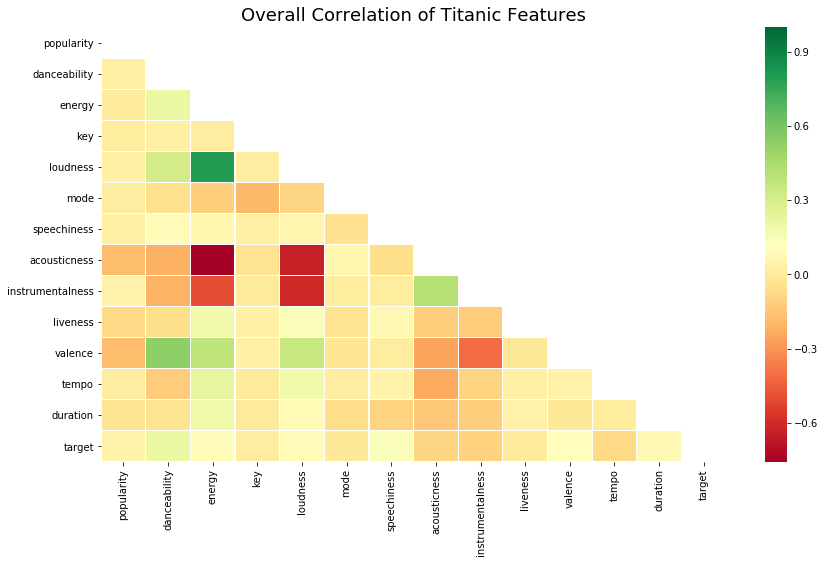

In [413]:
# inicializamos correlación
corr = data.drop(['Unnamed: 0','id_new'], axis=1).corr()
# Configuramos Mascara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Tamaño figura
plt.figure(figsize=(14, 8))
# Titulo
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

Se aprecia que el target está desbalanceado, es decir, hay muchas más canciones que no son reggaeton. Es de especial cuidado este desbalanceo para las metricas de los modelos. 

0    2230
1      70
Name: target, dtype: int64


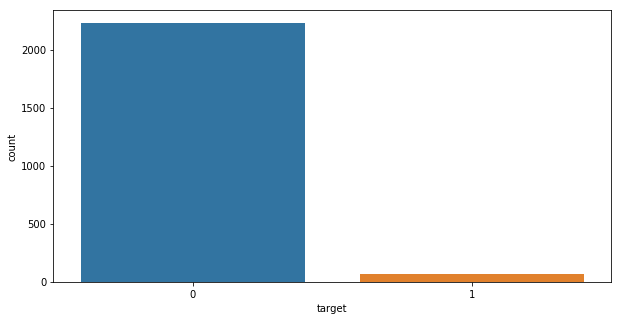

In [414]:
plt.figure(figsize = (10,5))
sns.countplot(x='target', data = data)
print(data['target'].value_counts())

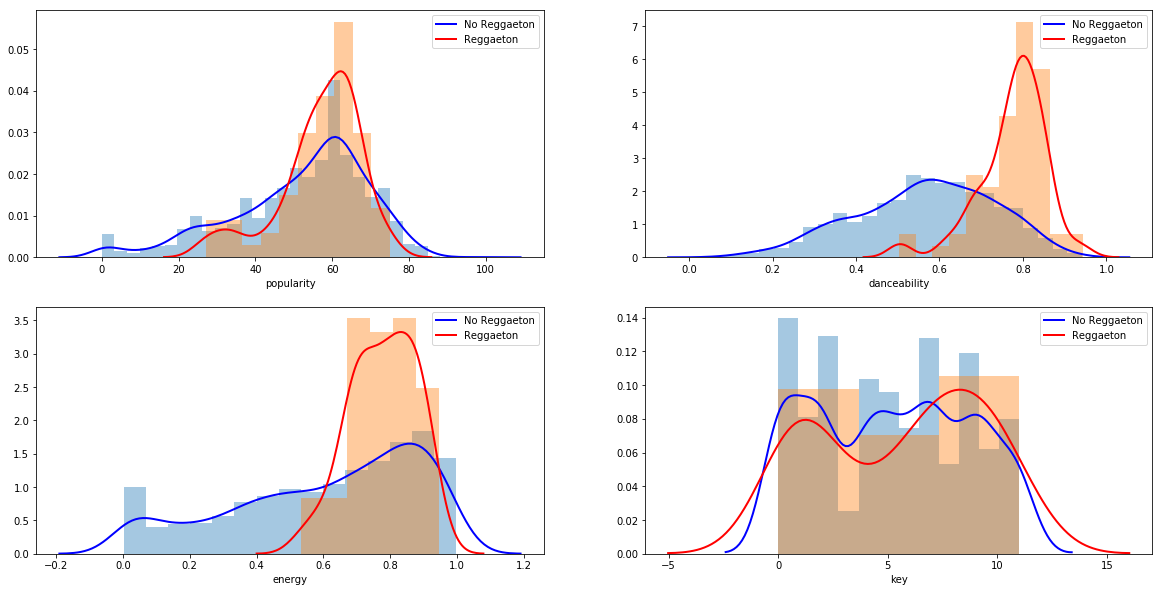

In [415]:
mask0 = data['target']==0
mask1 = data['target']==1

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['popularity'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['popularity'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,2)
sns.distplot(data['danceability'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['danceability'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,3)
sns.distplot(data['energy'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['energy'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,4)
sns.distplot(data['key'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['key'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

En las variables 'popularity', 'danceability' y 'energy' se puede ver que las districuciones agrupadas pro el target son considerablemente distintas, esto nos adelanta que serán variables importantes para los modelos, dado que están separando. Por otro lado, la variable 'Key' tiene una distribución similar entre ambos generos de música.  

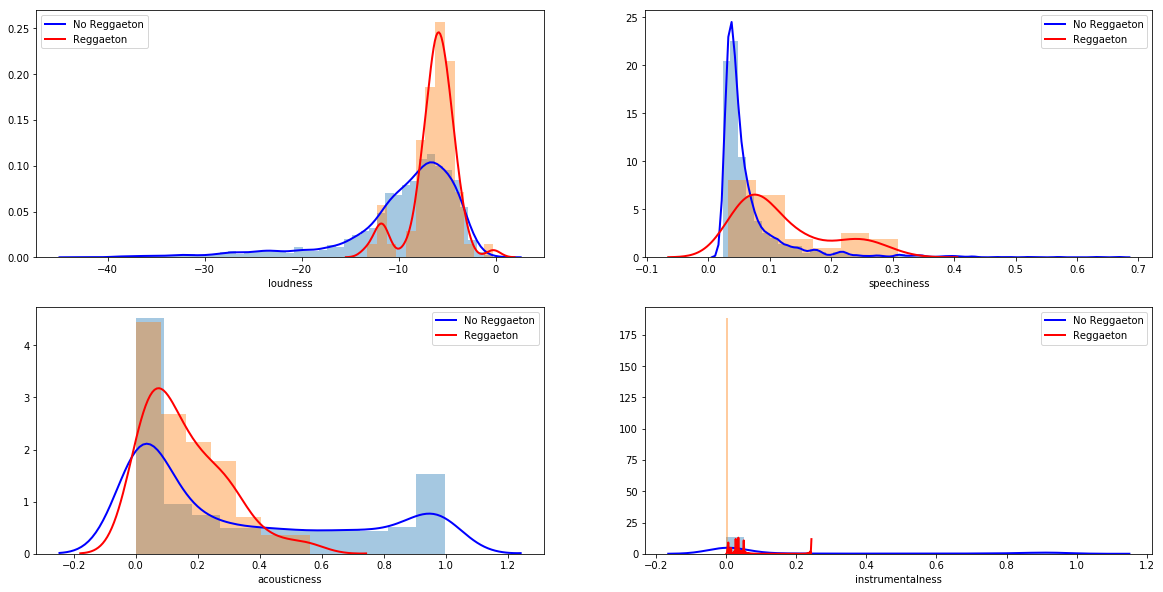

In [416]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['loudness'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['loudness'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,2)
sns.distplot(data['speechiness'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['speechiness'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,3)
sns.distplot(data['acousticness'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['acousticness'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,4)
sns.distplot(data['instrumentalness'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['instrumentalness'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

Las variables 'loudness', 'speechiness' y 'Instrumentalness' tienen ootlier, pues se nota en las colas de las distribución que están muy cargadas hacia los estremos, pero aún así se advierte que són variables que podrían ser buenas predictoras dada la separación entre distribuciones.

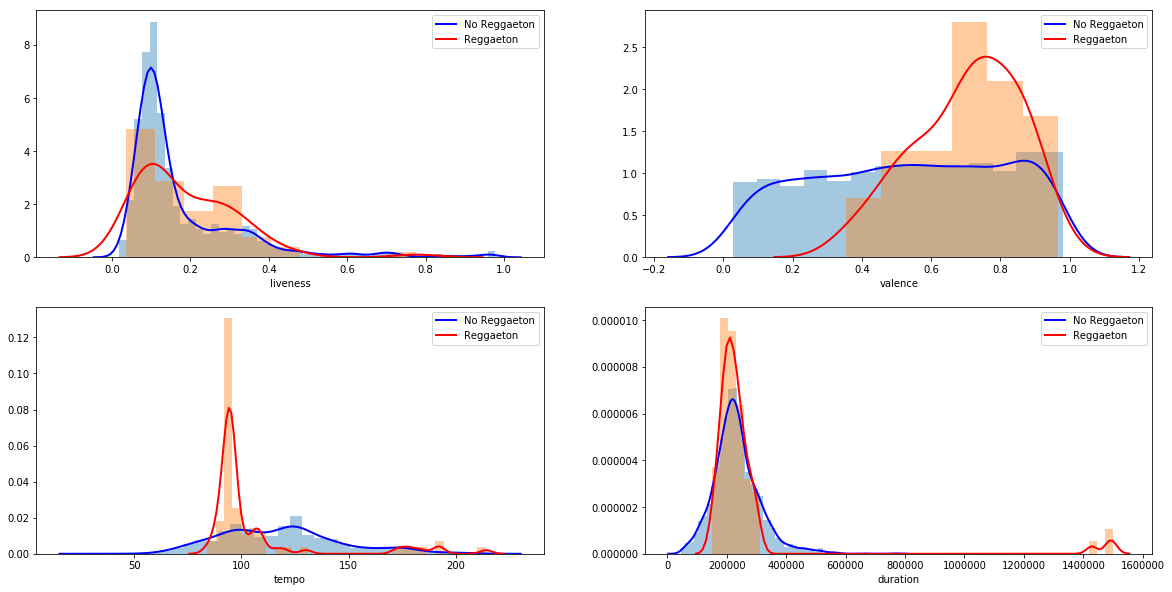

In [417]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['liveness'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['liveness'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,2)
sns.distplot(data['valence'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['valence'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,3)
sns.distplot(data['tempo'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['tempo'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

plt.subplot(2,2,4)
sns.distplot(data['duration'][mask0].dropna(),kde_kws={"color": "b", "lw": 2, "label": "No Reggaeton"})
sns.distplot(data['duration'][mask1],kde_kws={"color": "r", "lw": 2, "label": "Reggaeton"})

En general podemos ver que existen muchos outliear en la data y que las variables separan bien los grupos. 

1.0    1366
0.0     926
Name: mode, dtype: int64


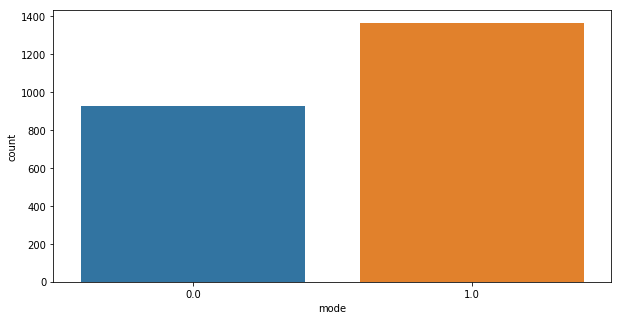

In [418]:
plt.figure(figsize = (10,5))
sns.countplot(x='mode', data = data)
print(data['mode'].value_counts())

Los gráficos de caja muestran mucho mejor si existen outlier y en este caso los hay.

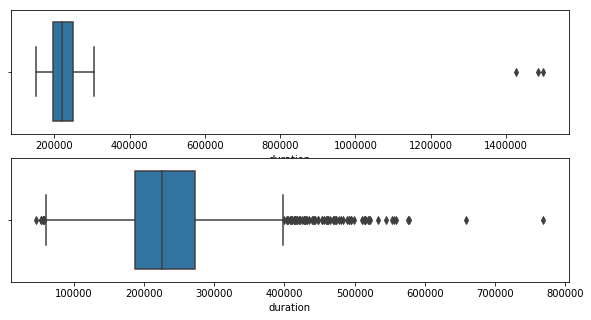

In [419]:
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.boxplot(x='duration', data = data[mask1])

plt.subplot(2,1,2)
sns.boxplot(x='duration', data = data[mask0])


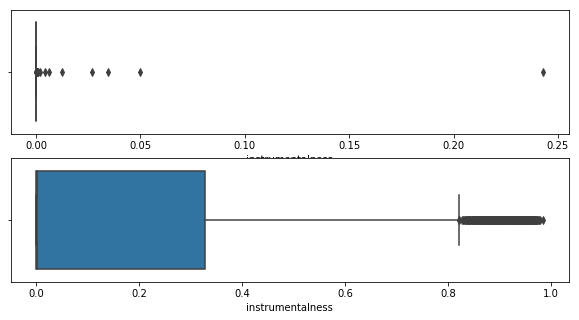

In [420]:
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.boxplot(x='instrumentalness', data = data[mask1])

plt.subplot(2,1,2)
sns.boxplot(x='instrumentalness', data = data[mask0])

### Ingeniería de variables

Dado que sólo la data que no contiene canciones de reggaeton es la que tiene nulos, imputaremos sólo en ese grupo y además se realizará reemplazando por la mediana de cada variable, dado que la data tiene muchos outlier y esta medida es la idóneo en estos casos. 

In [421]:
count_na = data_NoReggaeton.isnull().sum().values
nom_var = data_NoReggaeton.isnull().sum().index

mask=count_na>=1
nom_var_na = nom_var[mask]

for nom in nom_var_na:
    data[nom] = data.groupby('target')[nom].apply(lambda x: x.fillna(x.median()))
    
data.isna().sum()




Unnamed: 0          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
id_new              0
target              0
dtype: int64

Dado que la data tiene muchos outlier crearemos nuevas variables que contrendrán los cuartiles de las variables originales, así quitaremos el efecto outlier.

In [422]:
nom_var = ['popularity','danceability','energy','loudness','speechiness',
           'acousticness','liveness','valence','instrumentalness','tempo','duration']

nom_var_sufi=['{}_{}'.format(a, 'new') for a in nom_var]

for i, j in zip(nom_var, nom_var_sufi):
    data[j]=pd.qcut(data[i], 4)
    data[j] = LabelEncoder().fit_transform(data[j])
     

In [423]:
data.columns

Index(['Unnamed: 0', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'id_new', 'target', 'popularity_new',
       'danceability_new', 'energy_new', 'loudness_new', 'speechiness_new',
       'acousticness_new', 'liveness_new', 'valence_new',
       'instrumentalness_new', 'tempo_new', 'duration_new'],
      dtype='object')

### Machine Learning 

Para elegir el mejor algoritmo de machine learning echaremos a competir los siguientes modelos: 

- Random Forest
- KNN
- Logistic Regression
- XGB
- Gradient Boosting
- SVC
- Extra Trees
- AdaBoost
- GaussianNB
- Gaussian Process
- Bagging

Las etapas del modelado son las siguietes:

- 1) Entrenamiento con todas la variables y sólo con los modelos inicializados (se comparan en entrenamiento).
- 2) Entrenamiento de modelos inicializados pero con selección de variables. 
- 3) Se eligen los mejores 4 modelos y se cambian sus hiperparámetros.
- 4) Se elijen los mejores dos modelos y se comparan los resultados en test. 
- 4) Se elige mejor modelo en test para la clasificación final.

(La métrica utilizada para comparar los modelos será el índice Kappa,dado que las clases no están balanceadas)


Generamos las muestras de entrenamiento y test, luego escalamos todas las variables para que todos los modelos esten en igualdad de condiciones.

In [424]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Unnamed: 0','id_new','target'],axis=1), data['target'],test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

#### Paso 1: Se inicializan los modelos 

In [425]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(random_state=1, probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()


models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []
scorer = make_scorer(cohen_kappa_score)

for mod in models:
    mod.fit(X_train_scaler, y_train)
    KPP = cross_val_score(mod, X_train_scaler, y_train, scoring = scorer, cv = 10)
    scores.append(KPP.mean())

Podemos ver que el modelo AdaBoost es el mejor en esta primera etapa con un índice Kappa de 0.54 que nos dice que la predicción es buena.

In [426]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'KPP': scores})

result_df = results.sort_values(by='KPP', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,KPP
0,AdaBoost,0.547825
1,Gradient Boosting,0.478123
2,Logistic Regression,0.425504
3,XGBoost,0.405150
4,Bagging Classifier,0.382030
5,Extra Trees,0.353731
6,Gaussian Process,0.346026
7,Gaussian Naive Bayes,0.286129
8,K Nearest Neighbour,0.259021
9,Random Forest,0.258265


#### Paso 2: Selección de variables importantes

Para seleccionar las varibles más importantes se toman las variables importantes de 5 modelos y se promedian y ordenan de forma descendete, esto deja en las primeras filas las variables más importantes.

In [427]:
ada_imp = pd.DataFrame({'Feature':data.drop(['Unnamed: 0','id_new','target'],axis=1).columns, 'ada importance':ada.feature_importances_})
gbc_imp = pd.DataFrame({'Feature':data.drop(['Unnamed: 0','id_new','target'],axis=1).columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':data.drop(['Unnamed: 0','id_new','target'],axis=1).columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':data.drop(['Unnamed: 0','id_new','target'],axis=1).columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':data.drop(['Unnamed: 0','id_new','target'],axis=1).columns, 'ext importance':ext.feature_importances_})


importancia = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importancia['Average'] = importancia.mean(axis=1)
importancia = importancia.sort_values(by='Average', ascending=False).reset_index(drop=True)

Variables_importantes = importancia['Feature'].head(15).values

X_train_select = X_train[Variables_importantes]
X_test_select = X_test[Variables_importantes]

scaler = StandardScaler()
X_train_imp = scaler.fit_transform(X_train_select)
X_test_imp = scaler.transform(X_test_select)

importancia

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,tempo,0.253235,0.090038,0.107777,0.073948,0.18,0.141000
1,danceability,0.188163,0.166851,0.112268,0.045370,0.08,0.118530
2,energy,0.146757,0.159192,0.052029,0.051715,0.10,0.101939
3,speechiness,0.100822,0.075593,0.102024,0.051587,0.14,0.094005
4,instrumentalness,0.069208,0.127824,0.047795,0.038900,0.04,0.064746
5,duration,0.058317,0.053997,0.041282,0.078413,0.08,0.062402
6,loudness,0.069555,0.047604,0.047259,0.034568,0.06,0.051797
7,popularity,0.005225,0.059818,0.050827,0.028708,0.08,0.044915
8,liveness,0.023293,0.053327,0.054010,0.012961,0.08,0.044718
9,acousticness,0.017020,0.084930,0.065146,0.035128,0.02,0.044445


Seleccionamos 16 variables para introducir nuevamente a los modelos y verificar si las predicciones en entrenamiento mejoraron. Efectivamente los modelos mejoraron, obteniendo 3 modelos con un índice Kappa superior a 0.5. 

In [428]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(random_state=1, probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()


models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []


for mod in models:
    mod.fit(X_train_imp, y_train)
    KPP = cross_val_score(mod, X_train_imp, y_train, scoring = scorer, cv = 10)
    scores_v2.append(KPP.mean())
    
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original KPP': scores,
    'KPP with feature selection': scores_v2})

result_df = results.sort_values(by='KPP with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original KPP,KPP with feature selection
0,K Nearest Neighbour,0.259021,0.564549
1,AdaBoost,0.547825,0.547825
2,Extra Trees,0.353731,0.504096
3,Gradient Boosting,0.478123,0.476265
4,Bagging Classifier,0.382030,0.416553
5,XGBoost,0.405150,0.409373
6,Gaussian Process,0.346026,0.396915
7,Random Forest,0.258265,0.366817
8,Logistic Regression,0.425504,0.353767
9,Gaussian Naive Bayes,0.286129,0.251269


#### Etapa 4: Se eligen los cuatro mejores modelos para cambiamos sus hiperparámetros.

- Partimos con el modelo con mejor resultado en Kappa K Nearest Neighbour 

In [429]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}


gd_knn=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

gd_knn.fit(X_train_imp, y_train)
print(gd_knn.best_score_)
print(gd_knn.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6321968314067555
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  5.2min finished


- El segundo mejor modelo fue AdaBoost

In [430]:
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd_abc=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

gd_abc.fit(X_train_imp, y_train)
print(gd_abc.best_score_)
print(gd_abc.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 385 out of 385 | elapsed:  2.3min finished


0.6128320006758755
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=250, random_state=None)


En tercer lugar tenemos a Extra Trees

In [431]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]


hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd_etc=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

gd_etc.fit(X_train_imp, y_train)
print(gd_etc.best_score_)
print(gd_etc.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5855694445334398
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  4.3min finished


- Por último en cuarto lugar tenemos a Gradient Boosting

In [432]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}


gd_gbc=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

gd_gbc.fit(X_train_imp, y_train)
print(gd_gbc.best_score_)
print(gd_gbc.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  4.1min finished


0.5246279087618274
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=750,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


Inicializamos los dos modelos mejores knn (Kappa 0.63) y adaBoost(Kappa 0.61) con sus respectivos hiperparámetros (mejores).  

In [436]:

knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')


ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=250, random_state=None)


models = [knn,ada]         
scorer = make_scorer(cohen_kappa_score)

for mod in models:
    mod.fit(X_train_imp, y_train)

#### Paso 4: Comparamos en test los dos mejores modelos entre los cuatros anterios (K Nearest Neighbour y AdaBoost): 


- K Nearest Neighbour: El modelo tiene una precisión del 99.13%, pero esta metrica no nos sirve dado que la clase está desbalanceada, es por esto que nos enfocaremso en el AUC y el índice Kappa. El AUC e índice Kappa son muy buenos en test con puntajes de 0.93 y 0.8 respectivamente, es curioso que es algo mejor que en entrenamiento. 

Accuracy: 0.9927536231884058
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       673
           1       0.88      0.82      0.85        17

   micro avg       0.99      0.99      0.99       690
   macro avg       0.94      0.91      0.92       690
weighted avg       0.99      0.99      0.99       690



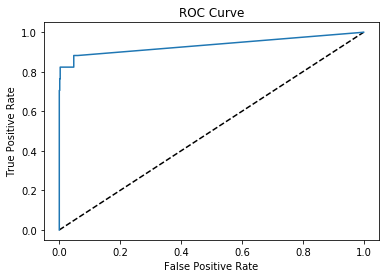

AUC: 0.9345336946071148
Kappa: 0.8447763880140376


array([[671,   2],
       [  3,  14]], dtype=int64)

In [437]:
y_pred = knn.predict(X_test_imp)  # Predict the labels of the test set: y_pred

# Compute and print metrics
print("Accuracy: {}".format(knn.score(X_test_imp, y_test)))
print(classification_report(y_test, y_pred))


y_pred_prob = knn.predict_proba(X_test_imp)[:,1]

fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)  # Generate ROC curve values: fpr, tpr, thresholds

plt.plot([0, 1], [0, 1], 'k--')  # Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
print("Kappa: {}".format(cohen_kappa_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)

- AdaBoost: El modelo tiene una precisión del 99.27%. El AUC e índice Kappa son muy buenos en test con puntajes de 0.93 y 0.84 respectivamente.

Accuracy: 0.9927536231884058
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       673
           1       1.00      0.71      0.83        17

   micro avg       0.99      0.99      0.99       690
   macro avg       1.00      0.85      0.91       690
weighted avg       0.99      0.99      0.99       690



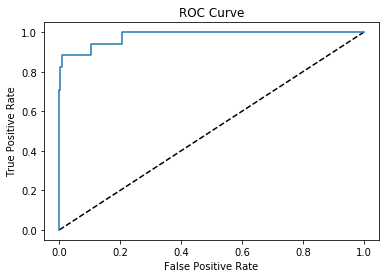

AUC: 0.9807709116335984
Kappa: 0.8239975512702785


array([[673,   0],
       [  5,  12]], dtype=int64)

In [438]:
y_pred = ada.predict(X_test_imp)  # Predict the labels of the test set: y_pred

# Compute and print metrics
print("Accuracy: {}".format(ada.score(X_test_imp, y_test)))
print(classification_report(y_test, y_pred))


y_pred_prob = ada.predict_proba(X_test_imp)[:,1]

fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)  # Generate ROC curve values: fpr, tpr, thresholds

plt.plot([0, 1], [0, 1], 'k--')  # Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
print("Kappa: {}".format(cohen_kappa_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)

Ambos modelos son muy buenos, pero dado que KNN se equivocó menos en clasificar a las canciones de reggaeton lo elegiré como modelo ganador, dado que capta mejor el comportamiento de ese grupo. 

#### Paso 5: Predicción final muestra de test

In [439]:
test = pd.read_csv('data/data_test.csv')
test.drop('time_signature',axis=1, inplace=True)

test['popularity'] = test['popularity'].astype(float)
test['key'] = test['key'].astype(float)
test['mode'] = test['mode'].astype(float)
test['duration'] = test['duration'].astype(float)

#nom_var = ['danceability','loudness','tempo']

nom_var = ['popularity','danceability','energy','loudness','speechiness',
           'acousticness','liveness','valence','instrumentalness','tempo','duration']

nom_var_sufi=['{}_{}'.format(a, 'new') for a in nom_var]

for i, j in zip(nom_var, nom_var_sufi):
    test[j]=pd.qcut(test[i], 4,  duplicates='drop')
    test[j] = LabelEncoder().fit_transform(test[j])


#peo=test.drop(['Unnamed: 0','id_new'], axis=1)
scaler = StandardScaler()
scaler.fit_transform(X_train_select)
test_scaler= scaler.transform(test[Variables_importantes])

In [440]:
y_pred = knn.predict(test_scaler) 

In [443]:
test['predic'] = y_pred
test.head()
test.to_csv('test_predic.csv')